In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
img_size = 250
input_shape = (img_size,img_size,3)
batch_size = 32
chanels = 3
epochs = 40
num_class = 4

In [12]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)


train_generator  = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (img_size, img_size),
    batch_size = batch_size,
    class_mode = 'sparse'
)

Found 4745 images belonging to 4 classes.


In [46]:
class_name = list(train_generator.class_indices.keys())
class_name

['BacterialBlight', 'Blast', 'Brownspot', 'Tungro']

In [13]:
val_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)


val_generator  = train_datagen.flow_from_directory(
    'dataset/val',
    target_size = (img_size, img_size),
    batch_size = batch_size,
    class_mode = 'sparse'
)
    

Found 594 images belonging to 4 classes.


In [14]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)


test_generator  = train_datagen.flow_from_directory(
    'dataset/test',
    target_size = (img_size, img_size),
    batch_size = batch_size,
    class_mode = 'sparse'
)

Found 593 images belonging to 4 classes.


In [20]:
model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(num_class, activation = "softmax")
])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 64)      

In [24]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch = 148,  
    batch_size = batch_size,
    validation_data = val_generator,
    validation_steps = 9,
    verbose = 1,
    epochs = epochs
)

Epoch 1/40
148/148 [==============================] - 147s 971ms/step - loss: 1.0643 - accuracy: 0.5215 - val_loss: 0.9234 - val_accuracy: 0.6354
Epoch 2/40
148/148 [==============================] - 52s 352ms/step - loss: 0.7338 - accuracy: 0.7223 - val_loss: 0.5538 - val_accuracy: 0.8229
Epoch 3/40
148/148 [==============================] - 49s 327ms/step - loss: 0.5365 - accuracy: 0.8042 - val_loss: 0.4075 - val_accuracy: 0.8681
Epoch 4/40
148/148 [==============================] - 48s 327ms/step - loss: 0.3814 - accuracy: 0.8551 - val_loss: 0.2570 - val_accuracy: 0.9167
Epoch 5/40
148/148 [==============================] - 48s 327ms/step - loss: 0.2670 - accuracy: 0.8958 - val_loss: 0.2526 - val_accuracy: 0.9062
Epoch 6/40
148/148 [==============================] - 49s 329ms/step - loss: 0.2493 - accuracy: 0.9043 - val_loss: 0.3100 - val_accuracy: 0.8611
Epoch 7/40
148/148 [==============================] - 50s 337ms/step - loss: 0.1709 - accuracy: 0.9380 - val_loss: 0.4786 - val_a

In [29]:
scores = model.evaluate(test_generator)

19/19 [==============================] - 11s 599ms/step - loss: 0.0123 - accuracy: 0.9966


In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

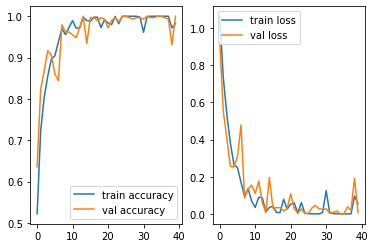

In [31]:
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label = 'train accuracy')
plt.plot(range(epochs), val_acc, label = 'val accuracy')
plt.legend(loc = 'lower right')

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label = 'train loss')
plt.plot(range(epochs), val_loss, label = 'val loss')
plt.legend(loc = 'upper left')

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)
    
    predd = model.predict(img_array)
    predd_class = class_name[np.argmax(predd[0])]
    confidence = round(100 * (np.max(predd[0])), 2)
    return predd_class, confidence

1/1 [==============================] - 0s 20ms/step


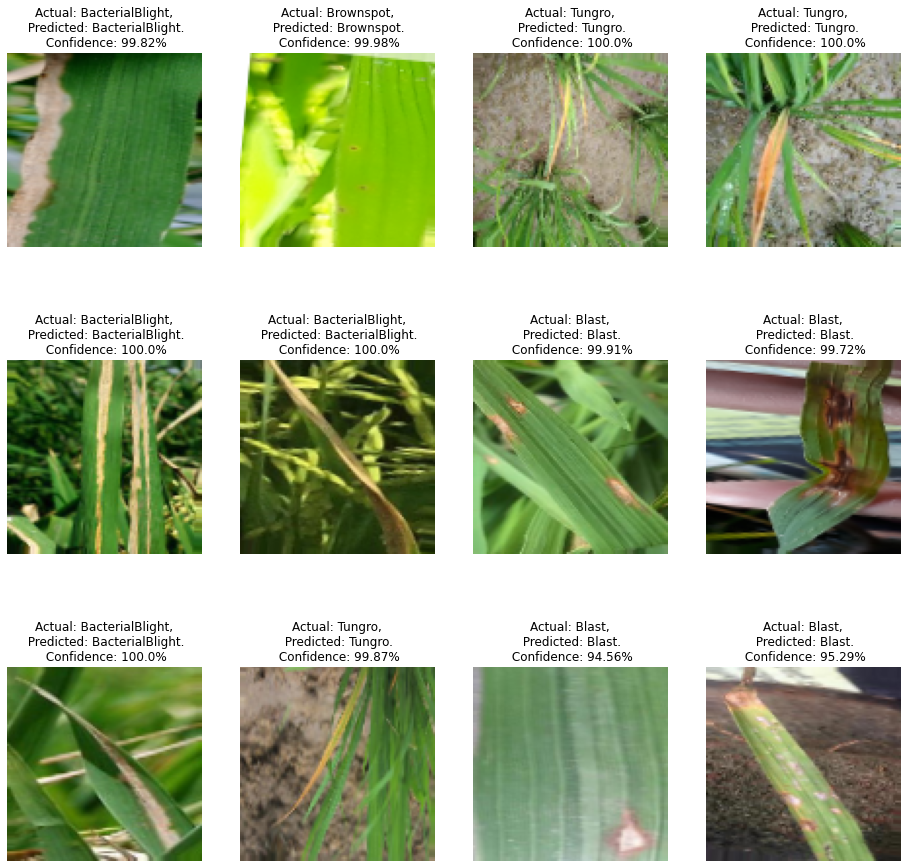

In [49]:
plt.figure(figsize = (16,16))
for imgs, labels in test_generator:
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(imgs[i])
        plt.axis("off")
        predd_class, confidence = predict(model, imgs[i])
        main_class = class_name[int(labels[i])]
        plt.title(f"Actual: {main_class},\n Predicted: {predd_class}.\n Confidence: {confidence}%")
    break

In [50]:
model.save("../rice.h5")